# Heart Disease Data Set

Reading in the data set

In [101]:
# import needed libraries 
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\resen\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['info']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [102]:
# read in data frame 
df=pd.read_csv("https://raw.githubusercontent.com/wresendiz1/MIS-373/main/heart_disease.csv")
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [103]:
df.shape

(4238, 16)

The dataframe has 4238 records and 16 features 

In [104]:
# drop null values 
df = df.dropna()
df.shape

(3656, 16)

After dropping null values, the data frame has 3656 records

Change prevalentStroke to a binary variable

In [105]:
df.prevalentStroke.replace(('yes', 'no'), (1, 0), inplace=True)
df[:10]

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
5,Female,43,primaryschool,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,No
6,Female,63,uneducated,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,yes
7,Female,45,primaryschool,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,No
8,Male,52,uneducated,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,No
9,Male,43,uneducated,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,No


Let's add a binary target variable based on the Heart_stroke variable

In [106]:
df['target'] = 0
df['target'][df['Heart_ stroke'] == 'yes'] = 1.0
df[:5]

C:\Users\resen\AppData\Local\Temp\ipykernel_23412\993278713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'][df['Heart_ stroke'] == 'yes'] = 1.0


,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke,target
0,Male,39,postgraduate,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No,0
1,Female,46,primaryschool,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No,0
2,Male,48,uneducated,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No,0
3,Female,61,graduate,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes,1
4,Female,46,graduate,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No,0


# Exploratory Analysis

Let's look at the statistics of the numerical variables in the data frame

In [107]:
df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate','glucose']].describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
age,3656.0,49.557440,8.561133,32.00,42.00,49.00,56.00,70.0
cigsPerDay,3656.0,9.022155,11.918869,0.00,0.00,0.00,20.00,70.0
totChol,3656.0,236.873085,44.096223,113.00,206.00,234.00,263.25,600.0
sysBP,3656.0,132.368025,22.092444,83.50,117.00,128.00,144.00,295.0
diaBP,3656.0,82.912062,11.974825,48.00,75.00,82.00,90.00,142.5
BMI,3656.0,25.784185,4.065913,15.54,23.08,25.38,28.04,56.8
heartRate,3656.0,75.730580,11.982952,44.00,68.00,75.00,82.00,143.0
glucose,3656.0,81.856127,23.910128,40.00,71.00,78.00,87.00,394.0


Here's a summary of those who haven't had a stroke

In [108]:
dfNo = df[df['target']==0]
dfNoSummary = dfNo[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate','glucose']].describe(include=[np.number]).T
dfNoSummary

,count,mean,std,min,25%,50%,75%,max
age,3099.0,48.708938,8.383279,32.00,42.00,48.00,55.00,70.00
cigsPerDay,3099.0,8.758632,11.715691,0.00,0.00,0.00,20.00,70.00
totChol,3099.0,235.169732,43.078009,113.00,205.00,232.00,261.00,453.00
sysBP,3099.0,130.280736,20.413624,83.50,116.00,127.00,141.00,243.00
diaBP,3099.0,82.148919,11.320205,52.00,74.00,81.00,88.00,142.50
BMI,3099.0,25.642975,3.965283,15.54,23.01,25.23,27.86,51.28
heartRate,3099.0,75.626331,11.953256,44.00,68.00,75.00,82.00,143.00
glucose,3099.0,80.620200,19.128713,40.00,71.00,78.00,86.00,386.00


Here's a summary of those who have had a stroke

In [109]:
dfYes = df[df['target']==1]
dfYesSummary = dfYes[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate','glucose']].describe(include=[np.number]).T
dfYesSummary

,count,mean,std,min,25%,50%,75%,max
age,557.0,54.278276,7.992338,35.00,49.00,55.00,61.00,69.0
cigsPerDay,557.0,10.488330,12.904685,0.00,0.00,1.00,20.00,60.0
totChol,557.0,246.350090,48.336365,124.00,214.00,243.00,272.00,600.0
sysBP,557.0,143.981149,26.966224,83.50,125.00,139.00,159.00,295.0
diaBP,557.0,87.157989,14.398497,48.00,78.00,85.00,95.00,140.0
BMI,557.0,26.569838,4.509435,15.96,23.63,26.11,28.94,56.8
heartRate,557.0,76.310592,12.141349,50.00,68.00,75.00,84.00,120.0
glucose,557.0,88.732496,40.785655,40.00,72.00,79.00,90.00,394.0


We can see that most features are higher for those with heart disease than without

Visualizing feature of stroke vs no stroke

In [110]:
# Slideshow Colors to use for visualizations
primary = "#00a4ca"
secondary = "#0082a9"
tertiary = "#8792df"
info = "#e1e9eb"

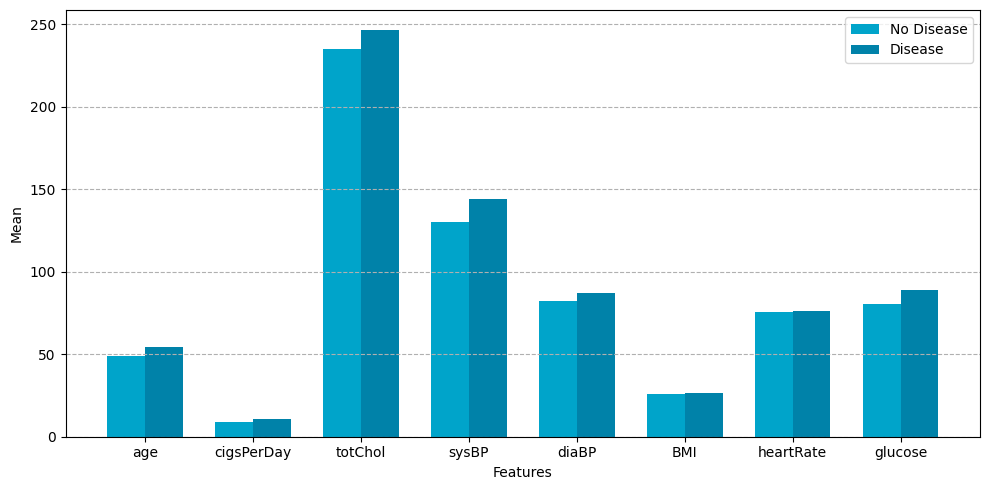

In [111]:
fig, ax = plt.subplots(figsize=(10, 5))

bar_width = 0.35

rects1 = ax.bar(np.arange(len(dfNoSummary)), dfNoSummary['mean'], width=bar_width, color=primary, label='No Disease')
rects2 = ax.bar(np.arange(len(dfYesSummary)) + bar_width, dfYesSummary['mean'], width=bar_width, color=secondary, label='Disease')

ax.set_xticks(np.arange(len(dfNoSummary)) + bar_width / 2)
ax.set_xticklabels(dfNoSummary.index)

ax.set_ylabel('Mean')
ax.set_xlabel('Features')
ax.grid( axis='y', linestyle='--')

ax.legend()

plt.tight_layout()
plt.show()

How many people in the data set have heart disease? 

In [112]:
# number of patients in the data set with and without 
df['target'].value_counts()

target
0    3099
1     557
Name: count, dtype: int64

As we can see, the data set is imbalanced. Only 15% have heart disease

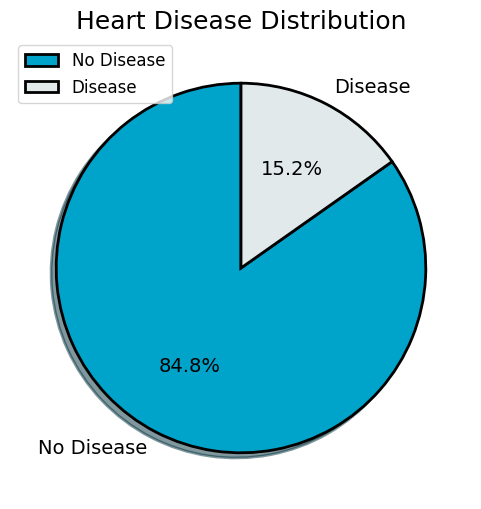

In [113]:
# Set up figure and axis objects
fig, ax = plt.subplots(figsize=(6, 6))

# Create pie chart with custom settings
pie_settings = {
    'labels': ['No Disease', 'Disease'],
    'colors': [primary, info],
    'autopct': '%1.1f%%',
    'shadow': True,
    'startangle': 90,
    'textprops': {'fontsize': 14},
    'wedgeprops': {'linewidth': 2, 'edgecolor': 'black'}
}

ax.pie(df['target'].value_counts(), **pie_settings)

# Add title and legend
ax.set_title('Heart Disease Distribution', fontsize=18)
ax.legend(pie_settings['labels'], loc='best', fontsize=12)

plt.show()


What is the age distribution of the data set? 

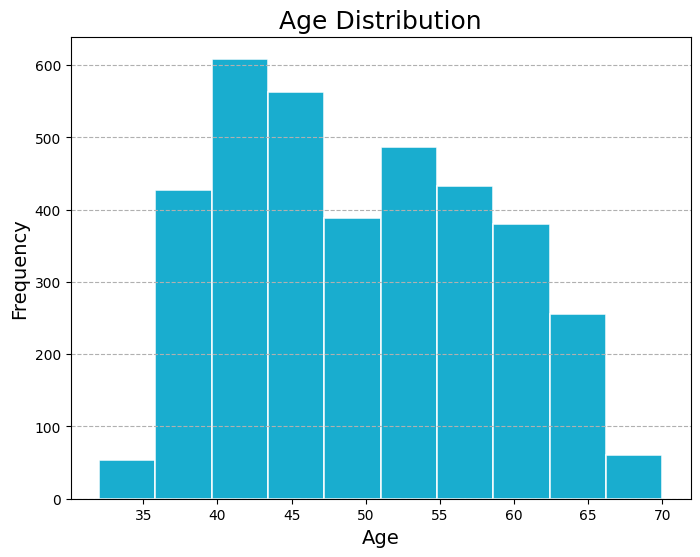

In [115]:

# Set up figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Create histogram with custom settings
hist_settings = {
    'bins': 10,
    'color': primary,
    'edgecolor': 'white',
    'histtype': 'bar',
    'linewidth': 1.2
}
ax.hist(df['age'], **hist_settings)


# Add title and axis labels
ax.set_title('Age Distribution', fontsize=18)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Add grid lines
ax.grid(axis='y', linestyle='--')

plt.show()


What are the average ages of people with and without heart disease? 

In [117]:
# average age of people with heart disease in the data set
avgAgeYes = df[df['target'] == 1]['age'].mean()
print('The average age of people with heart disease in this data set is ' + str(avgAgeYes))

# average age of people without heart disease in the data set
avgAgeNo = df[df['target'] == 0]['age'].mean()
print('The average age of people without heart disease in this data set is ' + str(avgAgeNo))

The average age of people with heart disease in this data set is 54.278276481149014
The average age of people without heart disease in this data set is 48.70893836721523


What proportion of the age groups have heart disease? 

In [118]:
# Create age groups
age_bins = [0, 40, 50, 60, 70]
age_labels = ['<40', '40-50', '50-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Calculate the proportion of people with heart disease for each age group
age_group_count = df.groupby(['age_group', 'target'])['age_group'].count().unstack()
age_group_count['Total'] = age_group_count.sum(axis=1)
age_group_count['Disease_Proportion'] = round(age_group_count[1] / age_group_count['Total'], 2)

# Display the results
print(age_group_count[['Disease_Proportion']])

target     Disease_Proportion
age_group                    
<40                      0.05
40-50                    0.10
50-60                    0.21
60+                      0.29


Can we see any relation between education status and proportion with heart diease? 

In [119]:
# Calculate the proportion of people with heart disease for each education group
prop_heart_disease = df.groupby('education')['target'].mean().sort_values()

# Print the results
print(prop_heart_disease)

education
primaryschool    0.118983
graduate         0.123762
postgraduate     0.141844
uneducated       0.190695
Name: target, dtype: float64


The plot shows that uneducated people have a higher proportion of people with heart disease.

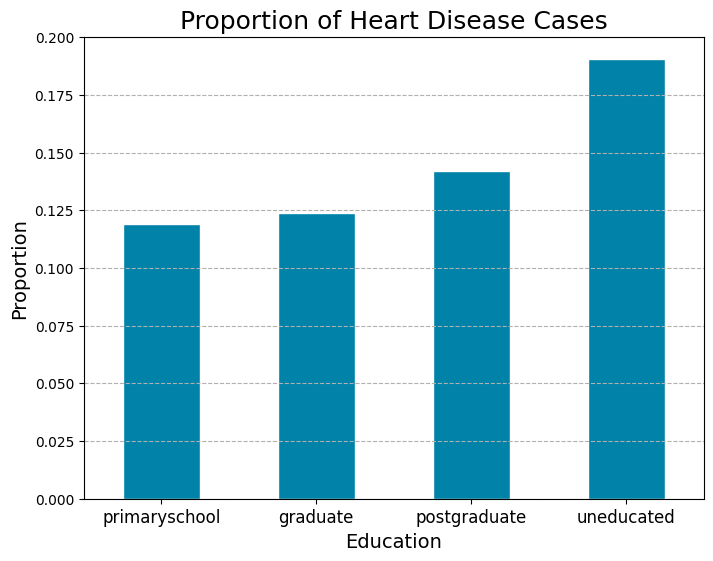

In [147]:

# Set up figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Create bar chart with custom settings
bar_settings = {
    'color': secondary,
    'edgecolor': 'white',
}
prop_heart_disease.plot(kind='bar', ax=ax, **bar_settings)

# Set title and axis labels
ax.set_title('Proportion of Heart Disease Cases', fontsize=18)
ax.set_xlabel('Education', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)

# Configure ticks and grid lines
ax.tick_params(axis='x', labelrotation=360, labelsize=12)
ax.grid(axis='y', linestyle='--')

plt.show()


The table below shows that smoking is associated with a higher proportion of people with heart disease for both males and females. Among non-smokers, females have a lower proportion of heart disease than males.

# Regression Task

In [122]:
# create design matrices 
formula = 'target ~ 0 + C(Gender) + age + C(education) + currentSmoker ' + \
           ' + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp'  + \
           ' + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose'

Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['target'].values


Plot Data- hypertension vs target? 

In [123]:
vs_target = pd.crosstab(df['prevalentHyp'], df['target'])
vs_target

target,0,1
prevalentHyp,,
0,2244,273
1,855,284


Normalize columns

In [124]:
total_v = vs_target.apply(sum)
total_v

target
0    3099
1     557
dtype: int64

In [125]:
vs_target /= total_v
vs_target

target,0,1
prevalentHyp,,
0,0.724105,0.490126
1,0.275895,0.509874


We can see that the proportion of the target is higher for people with hypertension

Text(0.5, 0, 'Prevalent Hypertension?')

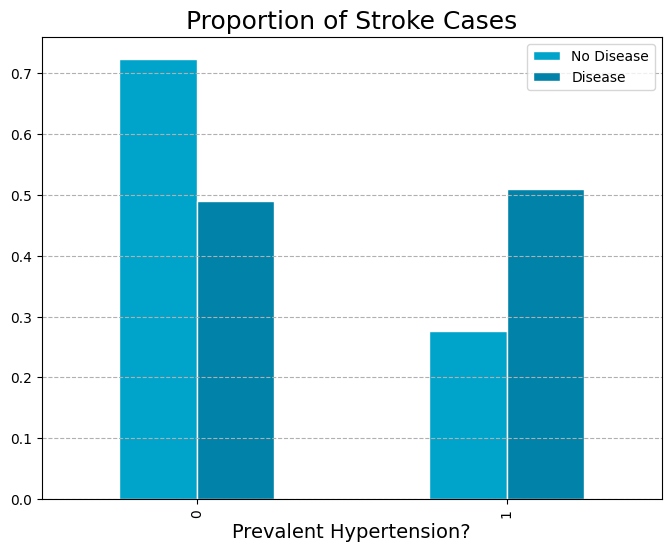

In [146]:
# change name of columns
fig, ax = plt.subplots(figsize=(8, 6))
bar_settings = {
    "color": [primary, secondary],
    "edgecolor": "white"
}
vs_target.columns = ['No Disease', 'Disease']
vs_target.plot(kind='bar', ax=ax, **bar_settings)
ax.grid(axis='y', linestyle='--')
ax.set_title('Proportion of Stroke Cases', fontsize=18)
ax.set_xlabel('Prevalent Hypertension?', fontsize=14)



Split data into training and testing

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Fit the Classifier

In [129]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

c:\Users\resen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy

In [130]:
prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

0.845642829230168


Testing Accuracy

In [131]:
prediction = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.8614402917046491


Baseline Accuracy

In [132]:
print('Number of positive examples =', len(y_train[y_train==1]))
print('Number of negative examples =', len(y_train[y_train==0]))

negative_examples_in_test = len(y_test[y_test==0])
total_examples_in_test = len(y_test)

print('Number of examples where baseline is correct =', negative_examples_in_test)
print('Baseline accuracy =', negative_examples_in_test * 1.0 / total_examples_in_test)

Number of positive examples = 402
Number of negative examples = 2157
Number of examples where baseline is correct = 942
Baseline accuracy = 0.8587055606198724


Feature Weights

In [133]:
model.coef_

array([[-5.33154172e-01,  3.00811876e-01, -7.56444937e-02,
        -3.07514940e-01,  2.16739791e-01,  1.77331079e-02,
        -1.00896772e-01,  9.65469066e-03,  1.00026654e-01,
         2.07720889e-02,  5.21010644e-01,  1.12316230e-01,
         5.97279192e-05,  2.19150714e-02, -2.93728016e-02,
        -5.33005435e-02, -2.65496614e-02,  5.01673118e-03]])

In [134]:
model.intercept_

array([-0.23249048])

In [135]:
weights = Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values(ascending=False)

prevalentHyp                     0.521011
C(Gender)[Male]                  0.300812
C(education)[T.uneducated]       0.216740
diabetes                         0.112316
BPMeds                           0.100027
sysBP                            0.021915
prevalentStroke                  0.020772
age                              0.017733
cigsPerDay                       0.009655
glucose                          0.005017
totChol                          0.000060
heartRate                       -0.026550
diaBP                           -0.029373
BMI                             -0.053301
C(education)[T.postgraduate]    -0.075644
currentSmoker                   -0.100897
C(education)[T.primaryschool]   -0.307515
C(Gender)[Female]               -0.533154
dtype: float64

In [136]:
# converting the coefficients into odds ratios
import numpy as np
odds_ratio = np.exp(weights)
odds_ratio.sort_values(ascending=False)

prevalentHyp                     1.683728
C(Gender)[Male]                  1.350955
C(education)[T.uneducated]       1.242021
diabetes                         1.118867
BPMeds                           1.105200
sysBP                            1.022157
prevalentStroke                  1.020989
age                              1.017891
cigsPerDay                       1.009701
glucose                          1.005029
totChol                          1.000060
heartRate                        0.973800
diaBP                            0.971054
BMI                              0.948095
C(education)[T.postgraduate]     0.927146
currentSmoker                    0.904026
C(education)[T.primaryschool]    0.735272
C(Gender)[Female]                0.586751
dtype: float64

An odds ratio of 1.69 for prevalent hypertension means that individuals with prevalent hypertension are 1.69 times more likely to have heart disease compared to individuals without hypertension, after adjusting for the other factors included in the logistic regression model


*   This indicates that some of the most impactful variables are: Hypertension, gender, education, currentSmoker, and diabetes.
*   This is somewhat consistent with our prior understanding of contributing factors to heart disease, but not exactly. 
*   Why aren't variables like glucose and cholestoral at the top? 

What if we normalized the numeric data? 

In [137]:
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# Apply the function to numeric columns
normalized_df = numeric_df.apply(normalize)

# Concatenate the normalized columns with the non-numeric columns
result_df = pd.concat([df.drop(columns=numeric_df.columns), normalized_df], axis=1)
result_df[:10]

,Gender,education,Heart_ stroke,age_group,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
0,Male,postgraduate,No,<40,0.184211,0.0,0.000000,0.0,0.0,0.0,0.0,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520,0.0
1,Female,primaryschool,No,40-50,0.368421,0.0,0.000000,0.0,0.0,0.0,0.0,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695,0.0
2,Male,uneducated,No,40-50,0.421053,1.0,0.285714,0.0,0.0,0.0,0.0,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746,0.0
3,Female,graduate,yes,60+,0.763158,1.0,0.428571,0.0,0.0,1.0,0.0,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
4,Female,graduate,No,40-50,0.368421,1.0,0.328571,0.0,0.0,0.0,0.0,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119,0.0
5,Female,primaryschool,No,40-50,0.289474,0.0,0.000000,0.0,0.0,1.0,0.0,0.236140,0.456265,0.656085,0.357731,0.333333,0.166667,0.0
6,Female,uneducated,yes,60+,0.815789,0.0,0.000000,0.0,0.0,0.0,0.0,0.188912,0.257683,0.243386,0.425836,0.161616,0.127119,1.0
7,Female,primaryschool,No,40-50,0.342105,1.0,0.285714,0.0,0.0,0.0,0.0,0.410678,0.078014,0.243386,0.148812,0.353535,0.107345,0.0
8,Male,uneducated,No,50-60,0.526316,0.0,0.000000,0.0,0.0,1.0,0.0,0.301848,0.274232,0.433862,0.262239,0.323232,0.110169,0.0
9,Male,uneducated,No,40-50,0.289474,1.0,0.428571,0.0,0.0,1.0,0.0,0.229979,0.371158,0.624339,0.195589,0.494949,0.135593,0.0


In [138]:
# create design matrices 
formula = 'target ~ 0 + C(Gender) + age + C(education) + currentSmoker ' + \
           ' + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp'  + \
           ' + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose'

Y, X = dmatrices(formula, result_df, return_type='dataframe')
y = Y['target'].values

# split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# fit the model 
model = LogisticRegression()
result = model.fit(X_train, y_train)

# training accuracy 
prediction_train = model.predict(X_train)
print('Training accuracy', metrics.accuracy_score(y_train, prediction_train))

# testing accuracy 
prediction = model.predict(X_test)
print('Testing accuracy', metrics.accuracy_score(y_test, prediction))

# baseline accuracy
print()
print('Number of positive examples =', len(y_train[y_train==1]))
print('Number of negative examples =', len(y_train[y_train==0]))
negative_examples_in_test = len(y_test[y_test==0])
total_examples_in_test = len(y_test)
print('Number of examples where baseline is correct =', negative_examples_in_test)
print('Baseline accuracy =', negative_examples_in_test * 1.0 / total_examples_in_test)

Training accuracy 0.8495506057053537
Testing accuracy 0.8587055606198724

Number of positive examples = 402
Number of negative examples = 2157
Number of examples where baseline is correct = 942
Baseline accuracy = 0.8587055606198724


In [139]:
# find feature weights
weights = Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values(ascending=False)

age                              2.204454
sysBP                            2.195798
glucose                          1.594276
totChol                          1.368694
cigsPerDay                       0.695932
diaBP                            0.545916
prevalentStroke                  0.466151
diabetes                         0.434814
BMI                              0.421605
C(Gender)[Male]                  0.310555
BPMeds                           0.267738
prevalentHyp                     0.227181
currentSmoker                    0.201213
C(education)[T.uneducated]       0.030000
C(education)[T.postgraduate]    -0.061429
C(education)[T.primaryschool]   -0.266625
heartRate                       -0.291778
C(Gender)[Female]               -0.308757
dtype: float64

In [140]:
# Weights converted to odds ratio
odds_ratio = np.exp(weights)
odds_ratio.sort_values(ascending=False)

age                              9.065298
sysBP                            8.987173
glucose                          4.924764
totChol                          3.930213
cigsPerDay                       2.005577
diaBP                            1.726188
prevalentStroke                  1.593847
diabetes                         1.544676
BMI                              1.524406
C(Gender)[Male]                  1.364182
BPMeds                           1.307005
prevalentHyp                     1.255057
currentSmoker                    1.222886
C(education)[T.uneducated]       1.030454
C(education)[T.postgraduate]     0.940420
C(education)[T.primaryschool]    0.765960
heartRate                        0.746934
C(Gender)[Female]                0.734359
dtype: float64

Here, we see that the most impactful features are: age, BP, glucose, cholestoral, and cigsPerDay (which is much more consistent with what we think intuitivley. Features like education are much less impactful after we normalized our data.

What if we ran the model with only the most impactful variables? 

In [141]:
# create design matrices 
formula2 = 'target ~ 0 + age + sysBP + glucose + ' + \
           ' + totChol + cigsPerDay'

Y, X = dmatrices(formula2, df, return_type='dataframe')
y = Y['target'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = LogisticRegression()
result = model.fit(X_train, y_train)

prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

prediction = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

print('Number of positive examples =', len(y_train[y_train==1]))
print('Number of negative examples =', len(y_train[y_train==0]))
negative_examples_in_test = len(y_test[y_test==0])
total_examples_in_test = len(y_test)
print('Number of examples where baseline is correct =', negative_examples_in_test)
print('Baseline accuracy =', negative_examples_in_test * 1.0 / total_examples_in_test)

0.8503321610003908
0.8605287146763901
Number of positive examples = 402
Number of negative examples = 2157
Number of examples where baseline is correct = 942
Baseline accuracy = 0.8587055606198724


Our testing accuracy improved from 85% to 86% with the new model!

In [142]:
model.intercept_

array([-8.97255779])

In [143]:
weights = Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values(ascending=False)

age           0.064053
cigsPerDay    0.025884
sysBP         0.017366
glucose       0.008748
totChol       0.002686
dtype: float64

In [144]:
# Weights converted to odds ratio
odds_ratio = np.exp(weights)
odds_ratio.sort_values(ascending=False)

age           1.066149
cigsPerDay    1.026222
sysBP         1.017518
glucose       1.008786
totChol       1.002690
dtype: float64

In [145]:
probability = odds_ratio / (1 + odds_ratio)

# Display the results
print(probability.sort_values(ascending=False))

age           0.516008
cigsPerDay    0.506471
sysBP         0.504341
glucose       0.502187
totChol       0.500672
dtype: float64


age(0.064053) + cigsPerDay(0.025884) + sysBP(0.017366) + glucose(0.008748) + totChol(0.002686) - 8.97255777

Input values would have to be normalized